<a href="https://colab.research.google.com/github/gundaminpde/2023_F_ML_lecture/blob/main/Easy_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning illustrated, ch 11 실행...

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

import string

import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
## gutenberg 프로젝드 데이터

from nltk.corpus import gutenberg


In [ ]:
gutenberg.fileids() ## 작품명

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
len(gutenberg.words() ) ## 단어 갯수

2621613

In [ ]:
## Corpus를 문장의 list로 만들기

gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [ ]:
gberg_sent_tokens[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [ ]:
gberg_sent_tokens[4]

'Between _them_ it was more the intimacy\nof sisters.'

In [ ]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [ ]:
word_tokenize(gberg_sent_tokens[1])[13]

'indulgent'

In [ ]:
#사실 구덴베르크 프로젝트는 sents() 내장 메소드가 있어서 알아서 다~해준다.

gberg_sents = gutenberg.sents()

gberg_sents[0:2]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I']]

In [ ]:
## 문장 하나 소문자로 바꾸기

[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [ ]:
stpwrds = stopwords.words('english') + list(string.punctuation) ## 불용어 구두점 모음

In [ ]:
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwrds] ## 불용어 구두점 없애기

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

In [ ]:
## 어간추출
stemmer = PorterStemmer() ## nltk의 포터 알고리즘


[stemmer.stem(w.lower()) for w in gberg_sents[4]
 if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

daughters가 daughter로 바뀐다.
house가 hous
early가 earli

In [ ]:
## n gram 다루기 --> gensim의 Phrases와 Phraser


phrases = Phrases(gberg_sents)
bigram = Phraser(phrases)

In [ ]:
bigram.phrasegrams # 바이그램 횟수와 점수를 출력합니다.

## 형식이 조금 바뀐 모양

{'two_daughters': 11.966813731181547,
 'her_sister': 17.7960829227865,
 "'_s": 31.066242737744524,
 'very_early': 11.01214147275924,
 'Her_mother': 13.529425062715127,
 'long_ago': 63.22343628984789,
 'more_than': 29.023584433996874,
 'had_been': 22.306024648925288,
 'an_excellent': 39.063874851750626,
 'Miss_Taylor': 453.75918026073305,
 'very_fond': 24.134280468850747,
 'passed_away': 12.35053642325912,
 'too_much': 31.376002029426687,
 'did_not': 11.72841621714281,
 'any_means': 14.096964108090186,
 'wedding_-': 17.4695197740113,
 'Her_father': 13.129571562488772,
 'after_dinner': 21.528548116881705,
 'self_-': 47.79018053120332,
 'sixteen_years': 107.0461671612265,
 'five_years': 40.128755673408115,
 'years_old': 54.735425236061104,
 'seven_years': 52.59411150244507,
 'each_other': 79.4168405322873,
 'a_mile': 12.783091600264584,
 'must_be': 10.229989650632808,
 'difference_between': 220.52537305244678,
 'could_not': 10.870983286982371,
 'having_been': 11.53801833156938,
 'miles_of

In [ ]:
tokenized_sentence = "Jon lives in New York City".split()
tokenized_sentence

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [ ]:
bigram[tokenized_sentence]

['Jon', 'lives', 'in', 'New_York', 'City']

**정리하면....**

In [ ]:
# Maas et al. (2001)에 따라
# - (감정을 표현하는) 불용어는 남겨 둡니다.
# - 어간 추출을 하지 않습니다(모델이 같은 어간을 갖는 단어의 비슷한 표현을 학습합니다).
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower()
                        not in list(string.punctuation)])

In [ ]:
lower_bigram = Phraser(Phrases(lower_sents))

In [ ]:
lower_bigram.phrasegrams # miss taylor, mr woodhouse, mr weston

{'two_daughters': 11.080802900992637,
 'her_sister': 16.93971298099339,
 'very_early': 10.516998773665177,
 'her_mother': 10.70812618607742,
 'long_ago': 59.22644201533601,
 'more_than': 28.529926612065935,
 'had_been': 21.583193129694834,
 'an_excellent': 37.41859680854167,
 'sixteen_years': 131.42913000977518,
 'miss_taylor': 420.4340982546865,
 'mr_woodhouse': 104.19907841850323,
 'very_fond': 24.185726346489627,
 'passed_away': 11.751473221742694,
 'too_much': 30.363090173835406,
 'did_not': 10.846196223896685,
 'any_means': 14.294148100212627,
 'after_dinner': 18.60737125272944,
 'mr_weston': 91.63290824201266,
 'five_years': 37.66428596665674,
 'years_old': 48.59909444619029,
 'seven_years': 50.3345604292756,
 'each_other': 71.31277029783762,
 'well_informed': 14.185028016786626,
 'a_mile': 11.700110753652233,
 'difference_between': 207.86784241868986,
 'mrs_weston': 180.6778969011602,
 'could_not': 10.213333164207082,
 'having_been': 10.723750443105281,
 'sixteen_miles': 105.040

In [ ]:
lower_bigram = Phraser(Phrases(lower_sents,
                               min_count=32, threshold=64)) ## 등장횟수와 연관점수
lower_bigram.phrasegrams

{'miss_taylor': 156.44059469941823,
 'mr_woodhouse': 82.04651843976633,
 'mr_weston': 75.87438262077481,
 'mrs_weston': 160.6848509325892,
 'great_deal': 93.36368125424357,
 'mr_knightley': 161.74131790625913,
 'miss_woodhouse': 229.03802722366902,
 'years_ago': 74.31594785893046,
 'mr_elton': 121.3990121932397,
 'dare_say': 89.94000515807346,
 'frank_churchill': 1316.4456593286038,
 'miss_bates': 276.3958829169252,
 'drawing_room': 84.91494947493561,
 'mrs_goddard': 143.57843432545658,
 'miss_smith': 73.03442128232508,
 'few_minutes': 204.16834974753786,
 'john_knightley': 83.03755747111268,
 'don_t': 250.30957446808512,
 'good_natured': 88.69936184891343,
 'few_moments': 107.77584531675087,
 'thousand_pounds': 166.51834523092802,
 'o_clock': 89.14789088153574,
 'jane_fairfax': 654.556591758761,
 'miss_fairfax': 196.19987447261062,
 'ma_am': 157.25846601094193,
 'mrs_elton': 93.08931456265867,
 'forty_years': 90.60220877269607,
 'cut_off': 129.60290535032792,
 'ten_thousand': 84.00099

In [ ]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])


clean_sents[0:9]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

# word2vec 실행

In [ ]:
## !pip install gensim==3.8.1

# 코랩에서 실행할 경우 다음 코드를 실행합니다.
!wget https://git.io/Jt02A -O clean_gutenberg_model.w2v

--2023-07-05 13:25:29--  https://git.io/Jt02A
Resolving git.io (git.io)... 140.82.113.21
Connecting to git.io (git.io)|140.82.113.21|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/dl-illustrated/raw/master/notebooks/clean_gutenberg_model.w2v [following]
--2023-07-05 13:25:31--  https://github.com/rickiepark/dl-illustrated/raw/master/notebooks/clean_gutenberg_model.w2v
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/dl-illustrated/master/notebooks/clean_gutenberg_model.w2v [following]
--2023-07-05 13:25:31--  https://raw.githubusercontent.com/rickiepark/dl-illustrated/master/notebooks/clean_gutenberg_model.w2v
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connec

In [ ]:
model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v')

In [ ]:
len(model.wv)

10329

In [ ]:
len(model.wv['dog'])

64

In [ ]:
model.wv.most_similar('dog', topn=3)

[('puppy', 0.7834004759788513),
 ('cage', 0.7651870846748352),
 ('brahmin', 0.7646074295043945)]

In [ ]:
model.wv.most_similar('eat', topn=3)

[('drink', 0.8292896747589111),
 ('bread', 0.8157558441162109),
 ('meat', 0.763256311416626)]

In [ ]:
model.wv.most_similar('father', topn=3)

[('mother', 0.8257375359535217),
 ('brother', 0.7275018692016602),
 ('sister', 0.7177824378013611)]

In [ ]:
model.wv.most_similar('ma_am', topn=3)

[('madam', 0.8472707867622375),
 ('nancy', 0.8370794057846069),
 ('betty', 0.8337127566337585)]

In [ ]:
model.wv.doesnt_match("mother father sister brother dog".split())

'dog'

In [ ]:
model.wv.similarity('father', 'dog')

0.44234338

In [ ]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])

[('mother', 0.7650133967399597),
 ('husband', 0.7556627988815308),
 ('sister', 0.7482179999351501),
 ('daughter', 0.7390403151512146),
 ('wife', 0.7284981608390808),
 ('sarah', 0.6856438517570496),
 ('daughters', 0.6652647256851196),
 ('conceived', 0.6637862920761108),
 ('rebekah', 0.6580977439880371),
 ('dearly', 0.6398963928222656)]

In [ ]:
model.wv.most_similar(positive=['husband', 'woman'], negative=['man'])

[('wife', 0.707526445388794),
 ('sister', 0.6973984837532043),
 ('maid', 0.6911259293556213),
 ('daughter', 0.6799546480178833),
 ('mother', 0.6583081483840942),
 ('child', 0.6433471441268921),
 ('conceived', 0.6391384601593018),
 ('harlot', 0.6089694499969482),
 ('daughters', 0.6069823503494263),
 ('marriage', 0.5894293785095215)]

t-SNE로 단어 벡터 차원 축소

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000)

In [ ]:
X_2d = tsne.fit_transform(model.wv[model.wv.key_to_index])
## (model.wv[model.wv.vocab])을 model.wv[model.wv.key_to_index]로 수정
## 시간이 오래 걸린다.

In [ ]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.key_to_index.keys()

In [ ]:
coords_df.head()

,x,y,token
0,-63.164253,12.903696,emma
1,-22.364326,-45.918285,by
2,-63.900620,10.296568,jane
3,-20.964903,-14.166339,volume
4,-29.035418,-22.398481,i


In [ ]:
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

In [ ]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

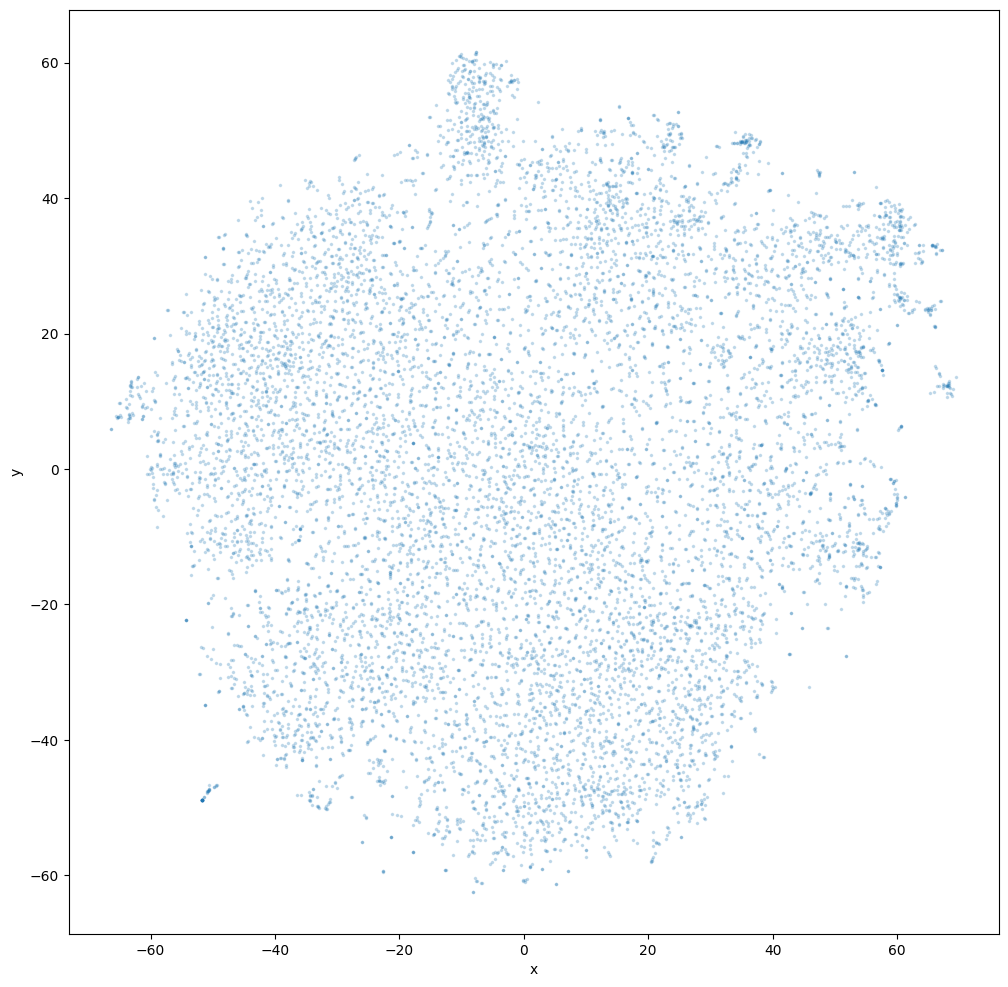

In [ ]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12),
                           marker='.', s=10, alpha=0.2)

In [ ]:
output_notebook()

In [ ]:
subset_df = coords_df.sample(n=500)

In [ ]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [ ]:
show(p)